In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import datetime
import tensorflow_addons as tfa
from tensorflow.keras import utils
from keras.layers import Dense, Activation, Flatten

In [2]:
data_2021 = pd.read_csv("données/valeursfoncieres-2021.csv", sep="|")

C:\Users\xavid\AppData\Local\Temp\ipykernel_23040\1030886028.py:1: DtypeWarning: Columns (18,23,24,26,28,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv("données/valeursfoncieres-2021.csv", sep="|")


In [3]:
pd.set_option('display.max_columns', None)
data_2021.tail()

,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
4375218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/03/2021,Vente,"383000,00",8.0,NaN,RUE,9382,DES TOURNELLES,75004.0,PARIS 04,75,104,NaN,AO,117,NaN,14.0,"28,86",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,30.0,2.0,NaN,NaN,NaN
4375219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17/03/2021,Vente,"260000,00",8.0,NaN,RUE,8561,SAINTE FOY,75002.0,PARIS 02,75,102,NaN,AP,128,NaN,304.0,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,37.0,2.0,NaN,NaN,NaN
4375220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/03/2021,Vente,"38000,00",6.0,NaN,RUE,4398,DES GUILLEMITES,75004.0,PARIS 04,75,104,NaN,AH,68,NaN,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4375221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/03/2021,Vente,"38000,00",30.0,NaN,RUE,7338,DU PETIT MUSC,75004.0,PARIS 04,75,104,NaN,AP,5,NaN,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4375222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/03/2021,Vente,"690000,00",3.0,NaN,RUE,8659,SAINT-JOSEPH,75002.0,PARIS 02,75,102,NaN,AI,34,NaN,29.0,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,Local industriel. commercial ou assimilé,NaN,56.0,0.0,NaN,NaN,NaN


In [4]:
data_2021_c = data_2021[['Date mutation', 'Nature mutation', 'Valeur fonciere', 'No voie', 'Code postal',
                         'Code departement', 'Code type local', 'Surface terrain', 'Surface reelle bati']]

In [5]:
data_2021_c.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,Code postal,Code departement,Code type local,Surface terrain,Surface reelle bati
0,05/01/2021,Vente,"185000,00",5080.0,1370.0,1,1.0,2410.0,97.0
1,05/01/2021,Vente,"185000,00",5080.0,1370.0,1,3.0,2410.0,0.0
2,06/01/2021,Vente,"10,00",NaN,1290.0,1,NaN,530.0,NaN
3,04/01/2021,Vente,"204332,00",7.0,1310.0,1,1.0,866.0,88.0
4,06/01/2021,Vente,"320000,00",87.0,1250.0,1,3.0,1426.0,0.0


In [6]:
data_2021_c['Nature mutation'].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir', 'Adjudication', 'Expropriation'],
      dtype=object)

In [7]:
data_2021_c.dropna(axis=0, inplace=True)
data_2021_c= data_2021_c.fillna(0)
data_2021_c = data_2021_c[data_2021_c['Nature mutation'] == 'Vente']
data_2021_c = data_2021_c[data_2021_c['Surface reelle bati'] != 0.0]
data_2021_c = data_2021_c.drop(columns='Nature mutation')
data_2021_c = data_2021_c.drop(columns='Code departement')


C:\Users\xavid\AppData\Local\Temp\ipykernel_23040\4089101704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021_c.dropna(axis=0, inplace=True)


In [8]:
data_2021_c.tail()

,Date mutation,Valeur fonciere,No voie,Code postal,Code type local,Surface terrain,Surface reelle bati
4375192,11/03/2021,"2000000,00",2.0,75002.0,2.0,77.0,39.0
4375193,11/03/2021,"2000000,00",2.0,75002.0,2.0,77.0,39.0
4375194,11/03/2021,"2000000,00",2.0,75002.0,2.0,77.0,39.0
4375195,11/03/2021,"2000000,00",2.0,75002.0,2.0,77.0,12.0
4375196,11/03/2021,"2000000,00",2.0,75002.0,2.0,77.0,39.0


In [9]:
data_2021_c['Valeur fonciere'] = data_2021_c['Valeur fonciere'].str.replace(',', '.')
data_2021_c['Valeur fonciere'] = data_2021_c['Valeur fonciere'].astype(float)
data_2021_c['Valeur fonciere'] = data_2021_c['Valeur fonciere'].astype(int)
data_2021_c['No voie'] = data_2021_c['No voie'].astype(int)
data_2021_c['Code postal'] = data_2021_c['Code postal'].astype(int)
data_2021_c['Code type local'] = data_2021_c['Code type local'].astype(int)
data_2021_c['Surface terrain'] = data_2021_c['Surface terrain'].astype(int)
data_2021_c['Surface reelle bati'] = data_2021_c['Surface reelle bati'].astype(int)


In [10]:
data_2021_c.tail()

,Date mutation,Valeur fonciere,No voie,Code postal,Code type local,Surface terrain,Surface reelle bati
4375192,11/03/2021,2000000,2,75002,2,77,39
4375193,11/03/2021,2000000,2,75002,2,77,39
4375194,11/03/2021,2000000,2,75002,2,77,39
4375195,11/03/2021,2000000,2,75002,2,77,12
4375196,11/03/2021,2000000,2,75002,2,77,39


In [11]:
data = data_2021_c.groupby('Date mutation')

In [12]:
data.tail()

,Date mutation,Valeur fonciere,No voie,Code postal,Code type local,Surface terrain,Surface reelle bati
17633,24/10/2021,500000,1167,1700,4,2889,35
278592,03/01/2021,19250,16,8700,4,110,53
278595,03/01/2021,19250,16,8700,2,110,16
278596,03/01/2021,19250,16,8700,2,110,52
299340,18/07/2021,164000,37,9300,1,411,95
...,...,...,...,...,...,...,...
4375192,11/03/2021,2000000,2,75002,2,77,39
4375193,11/03/2021,2000000,2,75002,2,77,39
4375194,11/03/2021,2000000,2,75002,2,77,39
4375195,11/03/2021,2000000,2,75002,2,77,12


Text(0, 0.5, 'date')

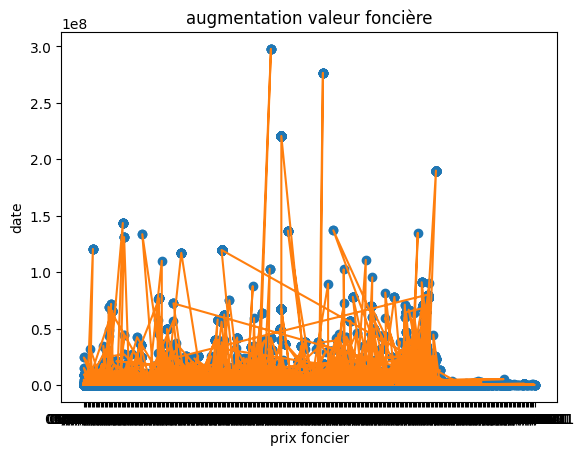

In [13]:
x = data_2021_c['Valeur fonciere']
y = data_2021_c['Date mutation']
plt.plot(y,x, 'o')
plt.plot(y,x)
plt.title('augmentation valeur foncière')
plt.xlabel('prix foncier')
plt.ylabel('date')

In [14]:
data_2021_c['Date mutation'] = pd.to_datetime(data_2021_c['Date mutation'])
data_2021_c['Date mutation'] = data_2021_c['Date mutation'].apply(lambda x: x.timestamp())


C:\Users\xavid\AppData\Local\Temp\ipykernel_23040\1714927785.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_2021_c['Date mutation'] = pd.to_datetime(data_2021_c['Date mutation'])


In [15]:
data_2021_c.tail()

,Date mutation,Valeur fonciere,No voie,Code postal,Code type local,Surface terrain,Surface reelle bati
4375192,1.635898e+09,2000000,2,75002,2,77,39
4375193,1.635898e+09,2000000,2,75002,2,77,39
4375194,1.635898e+09,2000000,2,75002,2,77,39
4375195,1.635898e+09,2000000,2,75002,2,77,12
4375196,1.635898e+09,2000000,2,75002,2,77,39


Text(0, 0.5, 'date')

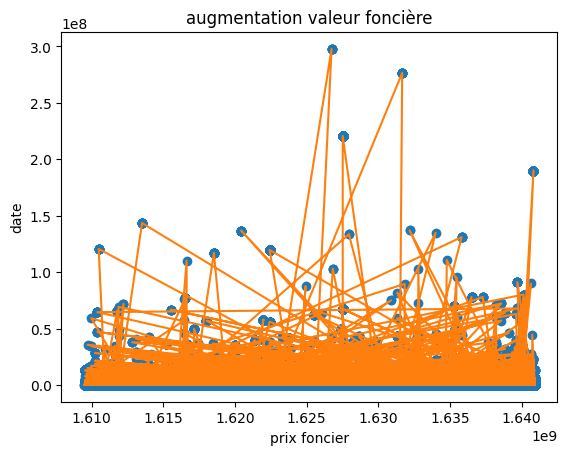

In [16]:
x = data_2021_c['Valeur fonciere']
y = data_2021_c['Date mutation']
plt.plot(y,x, 'o')
plt.plot(y,x)
plt.title('augmentation valeur foncière')
plt.xlabel('prix foncier')
plt.ylabel('date')

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(500, input_dim = 7, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(500, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(500, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=tf.keras.losses.MeanSquaredError(), metrics=['acc'])

In [28]:
history = model.fit(data_2021_c,
                    data_2021_c['Valeur fonciere'],
                    validation_split=0.2,
                    epochs=50,
                    batch_size=1000)

Epoch 1/50


C:\Users\xavid\miniconda3\envs\CNN\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


764/764 [==============================] - 7s 8ms/step - loss: 256143997796352.0000 - acc: 0.0015 - val_loss: 78676729266176.0000 - val_acc: 0.0024
Epoch 2/50
764/764 [==============================] - 6s 8ms/step - loss: 20690122047488.0000 - acc: 0.0015 - val_loss: 38056761491456.0000 - val_acc: 0.0024
Epoch 3/50
764/764 [==============================] - 6s 8ms/step - loss: 9447373012992.0000 - acc: 0.0018 - val_loss: 32532649213952.0000 - val_acc: 0.0024
Epoch 4/50
764/764 [==============================] - 6s 8ms/step - loss: 6869331476480.0000 - acc: 0.0020 - val_loss: 25827070705664.0000 - val_acc: 0.0024
Epoch 5/50
764/764 [==============================] - 6s 8ms/step - loss: 5817085984768.0000 - acc: 0.0021 - val_loss: 18095821291520.0000 - val_acc: 2.0946e-05
Epoch 6/50
764/764 [==============================] - 6s 8ms/step - loss: 5086197579776.0000 - acc: 0.0021 - val_loss: 14840908218368.0000 - val_acc: 0.0024
Epoch 7/50
764/764 [==============================] - 6s 8ms/s